***The following dataset was obtained from kaggle at***: https://www.kaggle.com/fedesoriano/stellar-classification-dataset-sdss17

In [46]:
import sklearn
import numpy as np                 # Linear Algebra Calculations
import pandas as pd                # DataFrames

In [47]:
## Importing the data from github repository.

url = 'https://raw.githubusercontent.com/tyleryou/star_classification/main/star_classification.csv'

dataset = pd.read_csv(url)

In [48]:
dataset['class'].describe() ## Checking the target.

count     100000
unique         3
top       GALAXY
freq       59445
Name: class, dtype: object

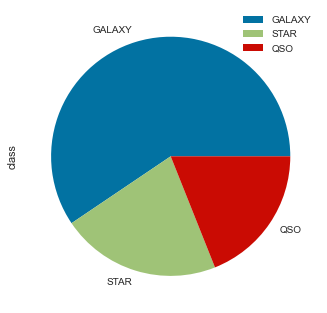

In [49]:
class_target = pd.DataFrame(dataset['class'].value_counts()).plot.pie(subplots=True) ## Distribution of the classification labels, looks like there's an abundance of galaxies.

In [50]:
dataset['class'].value_counts() ## Numerical representation of how the values are distributed.

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

In [51]:
dataset.head() ## Wildly scaled numeric values, no categorical features other than the target. Should be an easy dataset to work with.

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [52]:
dataset.info() ## No null values whatsoever? Awesome, no need to impute.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [53]:
y = dataset['class'] ## Separating the target classifier.
dataset = dataset.drop(columns=['class','rerun_ID']) ## All 'rerun_ID' feature instances only has one value, "313" No need to keep.

In [54]:
## Splitting the test and train sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size=0.2) ## 80% training set, 20% test set.

In [55]:
## Scaling the features.

from sklearn.preprocessing import StandardScaler 

nm = StandardScaler() 
X_train_scaled = pd.DataFrame(nm.fit_transform(X_train, y_train), columns = X_train.columns) 
X_test_scaled = pd.DataFrame(nm.transform(X_test), columns = X_test.columns)

In [56]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 1000) ## Changed max_iter for model convergence. 

In [57]:
lr.fit(X_train_scaled, y_train) ## Fitting the training set.

LogisticRegression(max_iter=1000)

In [58]:
lr_pred = lr.predict(X_test_scaled) ## Predicting values based on test features.

In [59]:
## Confusion Matrix

from sklearn.metrics import confusion_matrix 

cfsn_mrtx = confusion_matrix(y_test, lr_pred)

A confusion matrix helps establish model efficiency by showing if the values were correctly predicted. Since there are three labels to this classifier, there will be a 3x3 confusion matrix.

          --Confusion Matrix--
     0 = Galaxy, 1 = Star, 2 = Quasar
     
             0       1      2
        0 [11471,   163,   223] 
        1 [  467,  3345,     2]
        2 [    2,     8,  4319] 



In [60]:
from sklearn.metrics import accuracy_score

a_score = accuracy_score(y_test, lr_pred) ## Accuracy score tells us how efficient the model is at predicting values overall.

In [61]:
print("Accuracy score is: {}".format(a_score))

Accuracy score is: 0.95485


In [62]:
from sklearn.metrics import precision_score

p_score = precision_score(y_test, lr_pred, average = 'macro') ## Precision score tells us how efficient the model is at predicting actual positives. Macro weighs each class equally, using micro would weigh each sample equally.

In [63]:
print("Precision score is: {}".format(p_score))

Precision score is: 0.9514397219391985


In [64]:
from sklearn.metrics import recall_score

r_score = recall_score(y_test, lr_pred, average = 'macro') ## Recall score tells us how efficient the model is at predicting positive values out of total possible positive values.

In [65]:
print("Recall score is: {}".format(r_score))

Recall score is: 0.945408533458124


In [66]:
from sklearn.metrics import f1_score

f_score = f1_score(y_test, lr_pred, average = 'macro') ## Combines precision and recall, mostly used to compare two classifiers but I was curious what the value was.

In [67]:
print("F1 Score is: {}".format(f_score))

F1 Score is: 0.9476109174796129


In [68]:
lr_proba = lr.predict_proba(X_test_scaled) ## Predict_proba gives the probabilities of each class based on input features, not the actual predictions.

In [69]:
## Receiver Operating Characteristic Area Under Curve Score

from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, lr_proba, multi_class = 'ovo', average='macro') 

0.9887839482641949

ROC AUC score is the "Receiver Operating Characteristic Area Under the Curve", a plot that shows how efficient the model is. The AUC is the "Area Under the Curve", which gives us a numerical value to that efficiency.

In [70]:
from yellowbrick.classifier import ROCAUC



def plot_ROC_curve(model, xtrain, ytrain, xtest, ytest):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, classes=['GALAXY', 'STAR', 'QSO'])
                                        
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(xtrain, ytrain)
    visualizer.score(xtest, ytest)
    visualizer.show()
    
    return visualizer

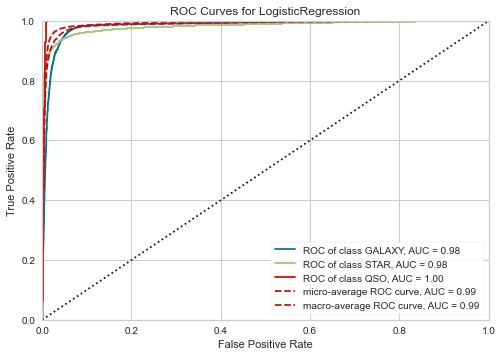

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       classes=['GALAXY', 'STAR', 'QSO'],
       estimator=LogisticRegression(max_iter=1000))

In [71]:
## ROC plot

plot_ROC_curve(lr, X_train_scaled, y_train, X_test_scaled, y_test)